
# Lets Grow More

# Data Science Intern

# Name: Himanshu Surkar

Task 2: Stock market prediction and forecasting using stacked LSTM

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df=pd.read_excel('NSE.xlsx')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [4]:
# sort with date 
df['Date']=pd.to_datetime(df['Date'])
print(type(df.Date[0]))
     

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [5]:
data=df.sort_values(by='Date')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [6]:
data.reset_index(inplace=True)

In [7]:
data.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


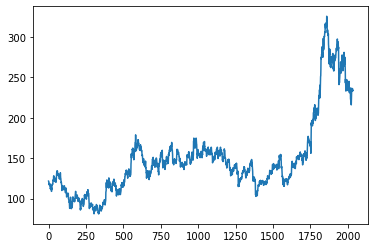

In [8]:
plt.plot(data['Close'])

In [9]:
df1=data['Close']

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [11]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:

training_size,test_size

(1424, 611)

In [13]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [14]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [16]:
print(X_test.shape), print(ytest.shape)

(510, 100)
(510,)


(None, None)

In [17]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
     

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:

model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 14s 257ms/step - loss: 0.0101 - val_loss: 0.0015
Epoch 2/60
19/19 [==============================] - 3s 151ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 3/60
19/19 [==============================] - 3s 142ms/step - loss: 9.5527e-04 - val_loss: 0.0013
Epoch 4/60
19/19 [==============================] - 3s 147ms/step - loss: 9.1232e-04 - val_loss: 0.0012
Epoch 5/60
19/19 [==============================] - 3s 142ms/step - loss: 8.7100e-04 - val_loss: 0.0012
Epoch 6/60
19/19 [==============================] - 3s 143ms/step - loss: 8.4557e-04 - val_loss: 0.0012
Epoch 7/60
19/19 [==============================] - 3s 149ms/step - loss: 8.1426e-04 - val_loss: 0.0011
Epoch 8/60
19/19 [==============================] - 3s 149ms/step - loss: 8.1775e-04 - val_loss: 0.0011
Epoch 9/60
19/19 [==============================] - 3s 147ms/step - loss: 7.7600e-04 - val_loss: 9.9665e-04
Epoch 10/60
19/19 [==============================] - 3s 149ms/step 

In [21]:
## Lets do the prediction and check performance metrics
test_predict=model.predict(X_test)

16/16 [==============================] - 2s 31ms/step


In [22]:

## Transform back to original form
test_predict1=scaler.inverse_transform(test_predict)

In [23]:
test_predict1

array([[143.57545 ],
       [143.85045 ],
       [143.23767 ],
       [141.03928 ],
       [139.14392 ],
       [138.14403 ],
       [138.74744 ],
       [140.14842 ],
       [140.94005 ],
       [140.9772  ],
       [140.81172 ],
       [141.60585 ],
       [142.37814 ],
       [143.79381 ],
       [145.84486 ],
       [144.92567 ],
       [142.85068 ],
       [141.84958 ],
       [141.91078 ],
       [145.68858 ],
       [150.10742 ],
       [153.15077 ],
       [154.34027 ],
       [153.01668 ],
       [152.28477 ],
       [151.71654 ],
       [151.82483 ],
       [153.14896 ],
       [154.1172  ],
       [154.43188 ],
       [154.78276 ],
       [153.9615  ],
       [151.27557 ],
       [146.20752 ],
       [142.17741 ],
       [140.29626 ],
       [139.983   ],
       [139.45135 ],
       [137.72223 ],
       [134.54742 ],
       [131.77164 ],
       [130.06161 ],
       [128.03606 ],
       [126.939926],
       [125.16772 ],
       [122.81057 ],
       [121.65051 ],
       [121.0

In [24]:
## Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(ytest,test_predict))

0.03069581583222221